<a href="https://colab.research.google.com/github/lhb00/basic_pytorch_for_deeplearning/blob/main/basic_pytorch_for_deeplearning_theme_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import torch
import numpy as np

x=torch.empty(5,4)
print(x)

tensor([[1.3375e-34, 0.0000e+00, 7.0065e-44, 7.0065e-44],
        [6.3058e-44, 6.7262e-44, 7.8473e-44, 6.3058e-44],
        [6.7262e-44, 7.4269e-44, 1.1771e-43, 6.7262e-44],
        [7.4269e-44, 8.1275e-44, 7.0065e-44, 7.5670e-44],
        [8.1275e-44, 7.0065e-44, 7.0065e-44, 6.4460e-44]])


In [34]:
torch.ones(3,3) #1로만 구성된 3X3 행렬

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [35]:
torch.zeros(2) #2행 0 벡터

tensor([0., 0.])

In [36]:
torch.rand(5,6) #랜덤한 숫자로 구성된 5X6 행렬

tensor([[0.8616, 0.3593, 0.2748, 0.0161, 0.6903, 0.0684],
        [0.3442, 0.3902, 0.0521, 0.3110, 0.2491, 0.8859],
        [0.6723, 0.3281, 0.5875, 0.8160, 0.0359, 0.8571],
        [0.8099, 0.7296, 0.1965, 0.5915, 0.2973, 0.7306],
        [0.5439, 0.2026, 0.3490, 0.4466, 0.2849, 0.9922]])

In [37]:
l = [13,4]
r = np.array([4,56,7])
torch.tensor(l) #텐서로 변환
torch.tensor(r)

tensor([ 4, 56,  7])

In [38]:
x.size()[1] #x.size는 5X4 크기의 텐서임.

4

In [39]:
type(x)

torch.Tensor

In [40]:
x = torch.rand(2,2)
y = torch.rand(2,2)
x+y

tensor([[1.3110, 1.8158],
        [0.8100, 0.8655]])

In [41]:
torch.add(x,y) #x+y와 동일

tensor([[1.3110, 1.8158],
        [0.8100, 0.8655]])

In [42]:
y.add(x) #y에 x를 더한다. 어차피 교환법칙 때문에 똑같.

tensor([[1.3110, 1.8158],
        [0.8100, 0.8655]])

In [43]:
y.add_(x) #y에 x를 더하여 y를 갱신함. 즉, y = x+y

tensor([[1.3110, 1.8158],
        [0.8100, 0.8655]])

In [44]:
x = torch.rand(8,8)
print(x.size())

torch.Size([8, 8])


In [45]:
a = x.view(64) #8X8에서 64로
print(a.size())

torch.Size([64])


In [46]:
b = x.view(-1,4,4) #-1을 사용하면 원래 크기가 되게 할 수 있다.
print(b.size())

torch.Size([4, 4, 4])


In [47]:
x = torch.rand(8,8)
y = x.numpy() #반대로 토치에서 넘파이로
type(y)

numpy.ndarray

In [48]:
x = torch.ones(1)
print(x.item())

1.0


###역전파
####(1)gradient tensor

In [49]:
#미분과 연쇄 법칙을 통해 원하는 변수에 대한 미분값 계산가능
import torch
x = torch.ones(2,2,requires_grad=True) #requires_grad=True는 gradient를 계산가능하게 해줌.
y = x+1
z = 2*y**2
r = z.mean()
print("Result:",r)

Result: tensor(8., grad_fn=<MeanBackward0>)


In [50]:
r.backward()
print(x.grad)

tensor([[2., 2.],
        [2., 2.]])


####autograd
#####자동미분

In [51]:
import torch
from matplotlib import pyplot as plt
x = torch.FloatTensor(range(5)).unsqueeze(1) #range(5) 까지만 봤을 때는 크기가 5인 1차원 배열, unsqueeze(1)을 이용하여 1차원 확장하여 2차원 배열로 만듦, unsqueeze(0)이면 (1,5) 배열
y = 2*x + torch.rand(5,1)
num_features = x.shape[1]
w = torch.randn(num_features,1,requires_grad=True)
b = torch.randn(1, requires_grad=True)
#데이터는 불변해야하지만, w, b는 역전파를 통해 최적값을 찾는 것이므로 requires_grad=True 옵션 추가해주어야함.

####경사하강법
#####가중치를 업데이트하는 최적화 방법 중 가장 널리 쓰이는 방법

In [52]:
learning_rate = 1e-3
optimizer = torch.optim.SGD([w,b], lr=learning_rate) #w,b를 리스트로 묶어 넣어주고 적절한 학습률을 정하여 가중치/편향 업데이트
loss_stack=[] #에포크 각각의 손실 값 저장을 위해 empty list 생성
for epoch in range(1001): #학습은 1000회 반복

  optimizer.zero_grad() # 누적 값을 optimizer.zero_grad()로 초기화
  y_hat=torch.matmul(x,w) + b # 회귀식 모델을 이용한 예측값 산출
  loss = torch.mean((y_hat-y)**2) # 예측값, 실제값으로 MSE(mean square error) 계산
  loss.backward() # 역전파의 기준을 손실 함수로 정하기
  optimizer.step() # optimizer로 최적화 실행
  loss_stack.append(loss.item()) # 손실 함수 값만 loss_stack에 하나씩 넣기. 손실 함수를 그리기 위함이므로 꼭 손실 함수 값만 넣기. item()을 사용하지 않으면 텐서 전체가 저장됨. 

  if epoch % 100 == 0:
    print(f'Epoch {epoch}:{loss.item()}') # 에포크가 100의 배수 일 때마다 손실 함수 값 출력

Epoch 0:40.83203125
Epoch 100:2.7963345050811768
Epoch 200:0.23321065306663513
Epoch 300:0.05743678659200668
Epoch 400:0.04267822578549385
Epoch 500:0.03908423334360123
Epoch 600:0.03653430566191673
Epoch 700:0.03431428596377373
Epoch 800:0.03234707564115524
Epoch 900:0.030601462349295616
Epoch 1000:0.029052358120679855


In [53]:
with torch.no_grad():
  y_hat = torch.matmul(x,w) + b #최종 학습된 w, b로 예측값 산출, 최적화 사용은 없으므로 requires_grad는 사용하지 않음. with torch.no_grad()로 requires_grad가 작동하지 않게 할 수 있음.

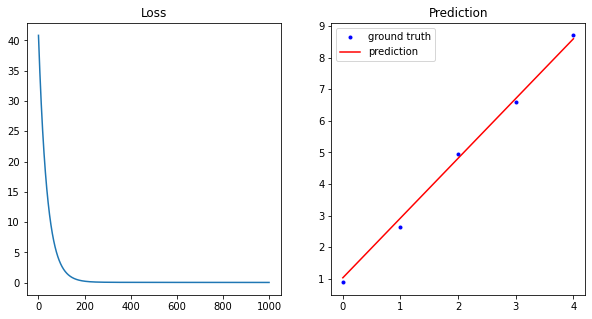

In [54]:
plt.figure(figsize=(10,5))
plt.subplot(121)
plt.plot(loss_stack)
plt.title("Loss")
plt.subplot(122)
plt.plot(x,y,'.b')
plt.plot(x,y_hat,'r-')
plt.legend(['ground truth','prediction'])
plt.title("Prediction")
plt.show()

###데이터 불러오기
####(1) 파이토치 제공 데이터 사용하기

In [55]:
import torch
import torchvision #이미지 관련 파이토치 라이브러리
import torchvision.transforms as tr #이미지 전처리 관련 라이브러리
from torch.utils.data import DataLoader,Dataset #데이터를 모델에 사용할 수 있도록 정리해주는 라이브러리
import numpy as np
import matplotlib.pyplot as plt

In [56]:
transf = tr.Compose([tr.Resize(16),tr.ToTensor()]) #16X16 사이즈로 이미지 크기 설정 후 텐서로 변환
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf) # 클래스가 10개인 CIFAR10 데이터 셋을 불러온다. train=True면 학습 데이터, 미리 선언한 전처리를 사용하기 위해 transform=transf 입력.
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transf)

Files already downloaded and verified
Files already downloaded and verified


In [57]:
print(trainset[0][0].size()) #trainset[0]는 이미지 하나와 라벨 하나가 저장 되어있음, trainset[0][0]은 이미지, trainset[0][1]은 라벨. 3, 16, 16에서 3은 채널 수, 16X16은 이미지 크기.
#일반적으로는 (너비)X(높이)X(채널 수)로 이미지를 표시하지만, pytorch에서는 (채널 수)X(너비)X(높이)로 이미지를 표시하니 주의!

torch.Size([3, 16, 16])


In [58]:
trainloader = DataLoader(trainset, batch_size=50,shuffle=True) #DataLoader는 데이터를 미니 배치 형태로 만들어줌 => 이 함수는 무작위로 데이터를 섞어 한번에 50개의 이미지를 묶은 배치로 제공하겠다는 뜻.
testloader = DataLoader(testset, batch_size=50, shuffle=False)

In [59]:
len(trainloader) #CIFAR10의 학습 이미지가 50000장, 배치 사이즈가 50장이므로 1000이라는 결과값이 나옴.

1000

In [60]:
images, labels = iter(trainloader).next() # iter, next 함수 => 배치 이미지를 간단히 확인하기 위해 사용.=>trainloader의 첫번째 배치 불러올 수 있음.
print(images.size()) # 배치 사이즈 = (배치 크기)X(채널 수)X(너비)X(높이), batch_size=50 옵션이 잘 적용된 것을 확인할 수 있음.

torch.Size([50, 3, 16, 16])


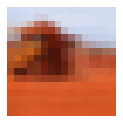

In [61]:
oneshot = images[1].permute(1,2,0).numpy() #image[1]의 크기는 (3,16,16)임. => 위에서 언급했듯이, 일반적인 그림은 (너비)X(높이)X(채널 수)로 표시되므로 채널 수가 가장 뒤로 가야한다. permute 함수는 그래서 이용한 것. 
plt.figure(figsize=(2,2))
plt.imshow(oneshot)
plt.axis("off")
plt.show()

In [63]:
# 같은 클래스 별로 폴더를 정리한 경우
transf = tr.Compose([tr.Resize(128),tr.ToTensor()])
trainset = torchvision.datasets.ImageFolder(root = './class', transform=transf) #데이터가 같은 클래스 별로 미리 폴더를 정리한 경우 별도의 라벨링 필요 X => 폴더 별로 자동으로 라벨링함.
trainloader = DataLoader(trainset, batch_size=1, shuffle=False)

FileNotFoundError: ignored

In [64]:
from torch.utils.data import Dataset

# class 클래스명(Dataset): # Dataset을 상속 => DataLoader에서 배치 단위로 불러올 수 있게 해줌.

      #def __init__(self): # 데이터 세팅에 필요한 것들을 미리 정의함.
      #def __getitem__(self,index): # DataLoader을 통해 샘플이 요청됨 => __getitem__(self,index)은 인덱스에 해당하는 샘플 찾아서 줌.
      #def __len__(self): # 크기 반환

In [65]:
# 크기가 32X32인 RGB 컬러 이미지 100장이 라벨 되어 있고, 넘파이 배열로도 정리가 되어 있다고 가정
train_images = np.random.randint(256, size=(100,32,32,3))/255
train_labels = np.random.randint(2,size=(100,1))

class TensorData(Dataset):

  def __init__(self, x_data, y_data): # __init__에서 데이터를 받아 self.x,y_data를 tensor로 변환
    self.x_data = torch.FloatTensor(x_data)
    self.x_data = self.x_data.permute(0,3,1,2) #permute 함수로 (이미지 수)X(너비)X(높이)X(채널 수)=>(배치 크기)X(채널 수)X(너비)X(높이)
    self.y_data = torch.LongTensor(y_data)
    self.len = self.y_data.shape[0] #입력 데이터의 개수에 대한 변수 self.len 생성

  def __getitem__(self,index): #__getitem__에는 뽑아낼 데이터에 대해 인덱스 처리하여 적어줌.
    return self.x_data[index], self.y_data[index]

  def __len__(self): #__len__에는 미리 선언한 self.len을 반환할 수 있도록 넣어줌.
    return self.len

In [66]:
train_data = TensorData(train_images, train_labels)
train_loader = DataLoader(train_data, batch_size=10, shuffle=True) #TensorData 클래스 train_data로 정의하여 DataLoader에 넣어주면 배치 데이터의 형태로 사용 가능

#### (4) 커스텀 데이터와 커스텀 전처리 사용

In [67]:
# pytorch는 전처리 함수들을 제공하여 매우 편리하게 사용 가능, but 이미지는 Image, Tensor 타입일 때만 사용 가능, 제공하지 않는 기능은 직접 구현해야함.
class ToTensor:#입력 데이터를 tensor 데이터로 변환, 학습에 맞는 크기로 변환
  def __call__(self,sample): # MyDataset 클래스의 sample을 불러와 작업하므로 __call__함수 사용.
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs)
    inputs = inputs.permute(2,0,1) #입력 값을 하나씩 불러옴(batch size는 영향이 없음) => permute(0,3,1,2)(X) permute(2,0,1)(O)
    return inputs, torch.LongTensor(labels)

In [68]:
class CutOut:

  def __init__(self, ratio=.5): # ToTensor와 다른 점 : 외부에서 CutOut 발생 비율을 받기 위해 __init__을 이용하여 ration를 받음. .5이므로 50%확률로 CutOut 발현.
    self.ratio = int(1/ratio)
  
  def __call__(self,sample):
    inputs, labels = sample #샘플을 받음.
    active = int(np.random.randint(0, self.ratio, 1)) # 정수를 뽑음. 50%일 경우 0 or 1, 0이면 CutOut 발현, 1이면 원본 그대로

    if active == 0:
      _, w, h = inputs.size() # 이미지의 너비와 높이를 받음
      min_len = min(w,h) # 최솟값을 구한다. inputs의 크기 = (채널 수, 너비, 높이) => 변수 3개 선언해야함. But, 채널 수는 상관 없기에 _로 값 저장 X
      box_size = int(min_len//4) # CutOut의 크기를 길이의 최솟값의 25%로 설정
      idx = int(np.random.randint(0, min_len-box_size, 1)) # idx를 통하여 CutOut 박스의 좌측 상단 꼭지점 위치를 정해줌.
      inputs[:,idx:idx+box_size,idx:idx+box_size] = 0 # 정사각형 영역의 값을 0으로 대체(코드 변형을 통하여 다른 모양 가능)

    return inputs, labels

In [69]:
# MyDataset에 전처리 추가
class MyDataset(Dataset):

  def __init__(self, x_data, y_data, transform=None): # transform=None 추가 : 아무것도 적지 않으면 전처리 사용 안함
    self.x_data = x_data
    self.y_data = y_data
    self.transform = transform
    self.len = len(y_data)
    self.tensor = ToTensor()

  def __getitem__(self, index):
    sample = self.x_data[index], self.y_data[index]

    if self.transform: # transform!=None이라면 __getitem__에서 sample을 반환하기 전에 전처리를 할 수 있는 if문 작성
      sample = self.transform(sample)
    else: #tranform==None이어도 기본적인 텐서 변환은 하도록 작성
      sample = self.tensor(sample)
    return sample

  def __len__(self):
    return self.len

In [70]:
trans = tr.Compose([ToTensor(),CutOut()]) #pytorch 기본 변환 tr.ToTensor() 대신 직접 만든 ToTensor() 사용
dataset1 = MyDataset(train_images, train_labels, transform=trans) # 정의된 전처리 입력한 데이터 셋 생성 & DataLoader 사용
train_loader1 = DataLoader(dataset1, batch_size=10, shuffle=True)

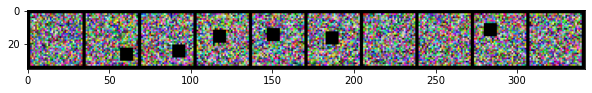

In [71]:
import torchvision # 그리드 생성해주는 torchvision.utils.make_grid 사용을 위하여 torchvision 불러옴
images1, labels1 = iter(train_loader1).next() #iter, next로 첫 번째 배치 불러와 결과 확인

def imshow(img): # r그림을 그리기 위하여 (채널 수 , 너비, 높이)인 이미지 크기를  permute(1,2,0)으로 (너비, 높이, 채널 수)로 변경 & numpy()를 이용하여 넘파이 배열로 변환(그림 그려야되니깐.)
  plt.figure(figsize=(10,100))
  plt.imshow(img.permute(1,2,0).numpy())
  plt.show()

imshow(torchvision.utils.make_grid(images1,nrow=10))

In [72]:
class MyTransform: # 전처리 클래스 MyTransform을 정의 => 원하는 전처리 모두 작성

  def __call__(self, sample):
    inputs, labels = sample
    inputs = torch.FloatTensor(inputs)
    inputs = inputs.permute(2,0,1)
    labels = torch.FloatTensor(labels)

    transf = tr.Compose([tr.ToPILImage(), tr.Resize(128), tr.ToTensor()]) # tr.Compose는 차례대로 전처리 작업 => 가장 첫번째에 tr.TOPILImage()를 넣어 이미지 타입 변경 가능.
    final_output = transf(inputs) # 다음 불러온 샘플을 전처리 작업에 넣어줌.

    return final_output, labels

In [73]:
dataset2 = MyDataset(train_images, train_labels, transform = MyTransform()) #MyDataset은 이전과 동일하게 사용하되, 전처리에 MyTransform을 넣어준다.
train_loader2 = DataLoader(dataset2, batch_size=10, shuffle=True)

#### 커스텀 전처리&pytorch에서 제공하는 전처리 함께 사용

In [104]:
# 이 CutOut은 위의 CutOut과 달리 라벨은 안받고 이미지만 받아 처리하도록 함.
# Why? Compose 내부에 있는 제공된 전처리는 이미지만 받아서 처리하기에, 그 양식을 맞춰 주어야 함.
# 우리가 만든 CutOut은 tensor, numpy array type 모두 작동 가능하지만, PILImage 타입에서는 타입 오류가 남.
# 따라서 tr.ToTensor() 뒤에 CutOut을 배치
class CutOut:
    
    def __init__(self, ratio=.5):
        self.ratio = int(1/ratio)
           
    def __call__(self, inputs):

        active = int(np.random.randint(0, self.ratio, 1))
        
        if active == 0:
            _, w, h = inputs.size()
            min_len = min(w, h)
            box_size = int(min_len//4)
            idx = int(np.random.randint(0, min_len-box_size, 1))
            inputs[:,idx:idx+box_size,idx:idx+box_size] = 0
        
        return inputs

In [105]:
transf = tr.Compose([tr.Resize(128), tr.ToTensor(), CutOut()])
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transf)

Files already downloaded and verified


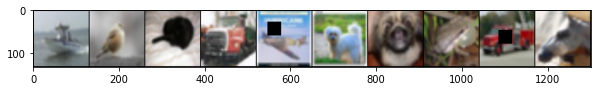

torch.Size([10, 3, 128, 128])


In [106]:
# 이 결과를 통해 CIFAR10 데이터가 배치 10개씩 나눠지고 이미지 사이즈를 128로 늘린 뒤 tensor로 변환되고 50% 확률로 무작위 선택하여 CutOut 적용한 것을 알 수 있음!
trainloader = DataLoader(trainset, batch_size=10, shuffle=True)
images, labels = iter(trainloader).next()
imshow(torchvision.utils.make_grid(images,nrow=10))
print(images.size())